# **WELCOME TO FIGG-CATNIP v1.0 - a versatile tool to quantitatively analyze transitional disk morphology.**

This is an enhanced version of the Disk Analysis Tool by the legendary Follette Lab alum Cat Sarosi, bundling the work of the equally legendary alum Alex DelFranco (developer of FIGG) and introducing new display considerations to uniformly process and plot multiwavelength disk imagery and intensity profiles for a wide variety of disks in a dynamic, flexible and user-friendly manner. Ensure that you have access to the three modules (sheetreader, figg, catnip), and please refer to my project report as a manual for the Google Sheets interface ("FIGG-CATNIP Interface"). All user-defined parameters are controlled via this interface, so once you're ready, simply **configure the settings in the cell below as needed** and execute all the cells in this notebook in order.

I developed this version of the tool for my SURF 2024 project.

*~ Bibi*

## Setup

In [ ]:
# Directory where modules are located
moduledir = '/content/drive/Shareddrives/Follette Lab/Summer 2024/Projects/Exoplanets/Circumstellar Disk Tool (Bibi)/TOOL/Final/Modules'
# Directory where fits files are located
datadir = '/content/drive/Shareddrives/Follette Lab/Summer 2024/Projects/Exoplanets/Circumstellar Disk Tool (Bibi)/TOOL/Final/DATA'
# URL of spreadsheet interface
wburl = 'https://docs.google.com/spreadsheets/d/1Tos2gWukEMvjOrZ0ai975ecqD1BH-rYwlr2dJd5__oM/edit#gid=0'
# Whether to pip install bettermoments and photutils
pip_install = False

# **IMPORTING MODULES**

In [1]:
# Pip install necessary packages
if pip_install:
    !pip install bettermoments
    !pip install photutils

  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#import my modules! :)
import sys
sys.path.append(moduledir)
import sheetreader
import catnip
from imp import reload
reload(sheetreader)
reload(catnip)

<module 'catnip' from '/content/drive/Shareddrives/Follette Lab/Summer 2024/Projects/Exoplanets/Circumstellar Disk Tool (Bibi)/TOOL/Final/Modules/catnip.py'>

In [4]:
import os
os.chdir(datadir)

In [6]:
# Authorizing google credentials to open google sheet
from google.colab import auth
import gspread
from google.auth import default # Import the google.auth library
auth.authenticate_user()

creds, _ = default() # Get credentials using google.auth
gc = gspread.authorize(creds) # Authorize gspread using the obtained credentials

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

# **RUNNING CODE**

In [7]:
# Read sheet and save the data and display dicts
wb = gc.open_by_url(wburl)
master_dict = sheetreader.wb_to_dict(wb, 'Image Data', add_paths=True, settings_sheet='Settings', namekey='Tracer', splitkey='Object')
master_display_dict = sheetreader.wb_to_dict(wb, 'Disk Information', settings_sheet='Display Settings')

In [10]:
# Create a dictionary of AstroObject instances
astro_objects = {}
disk_lst = [disk for disk in master_display_dict if master_display_dict[disk]['Use?']]
for disk in disk_lst:
    astro_objects[disk] = catnip.AstroObject(disk, master_dict[disk], master_display_dict[disk])

Processing HD 100453: 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]


Current image: HD 100453 scattered light
Applying r2 correction...
Applied r2 correction
Rotating over PAs...
Generating radial profile...
Generating azimuthal profiles...
HD 100453 scattered light done!
Current image: HD 100453 continuum
Overrode center
Rotating over PAs...
Generating radial profile...
Generating azimuthal profiles...
HD 100453 continuum done!


In [11]:
# Use this cell to update display dict info without reprocessing
wb = gc.open_by_url(wburl)
master_display_dict = sheetreader.wb_to_dict(wb, 'Disk Information', settings_sheet='Display Settings')
disk_lst = [disk for disk in master_display_dict if master_display_dict[disk]['Use?']]
for disk in disk_lst: astro_objects[disk].update(master_display_dict[disk])

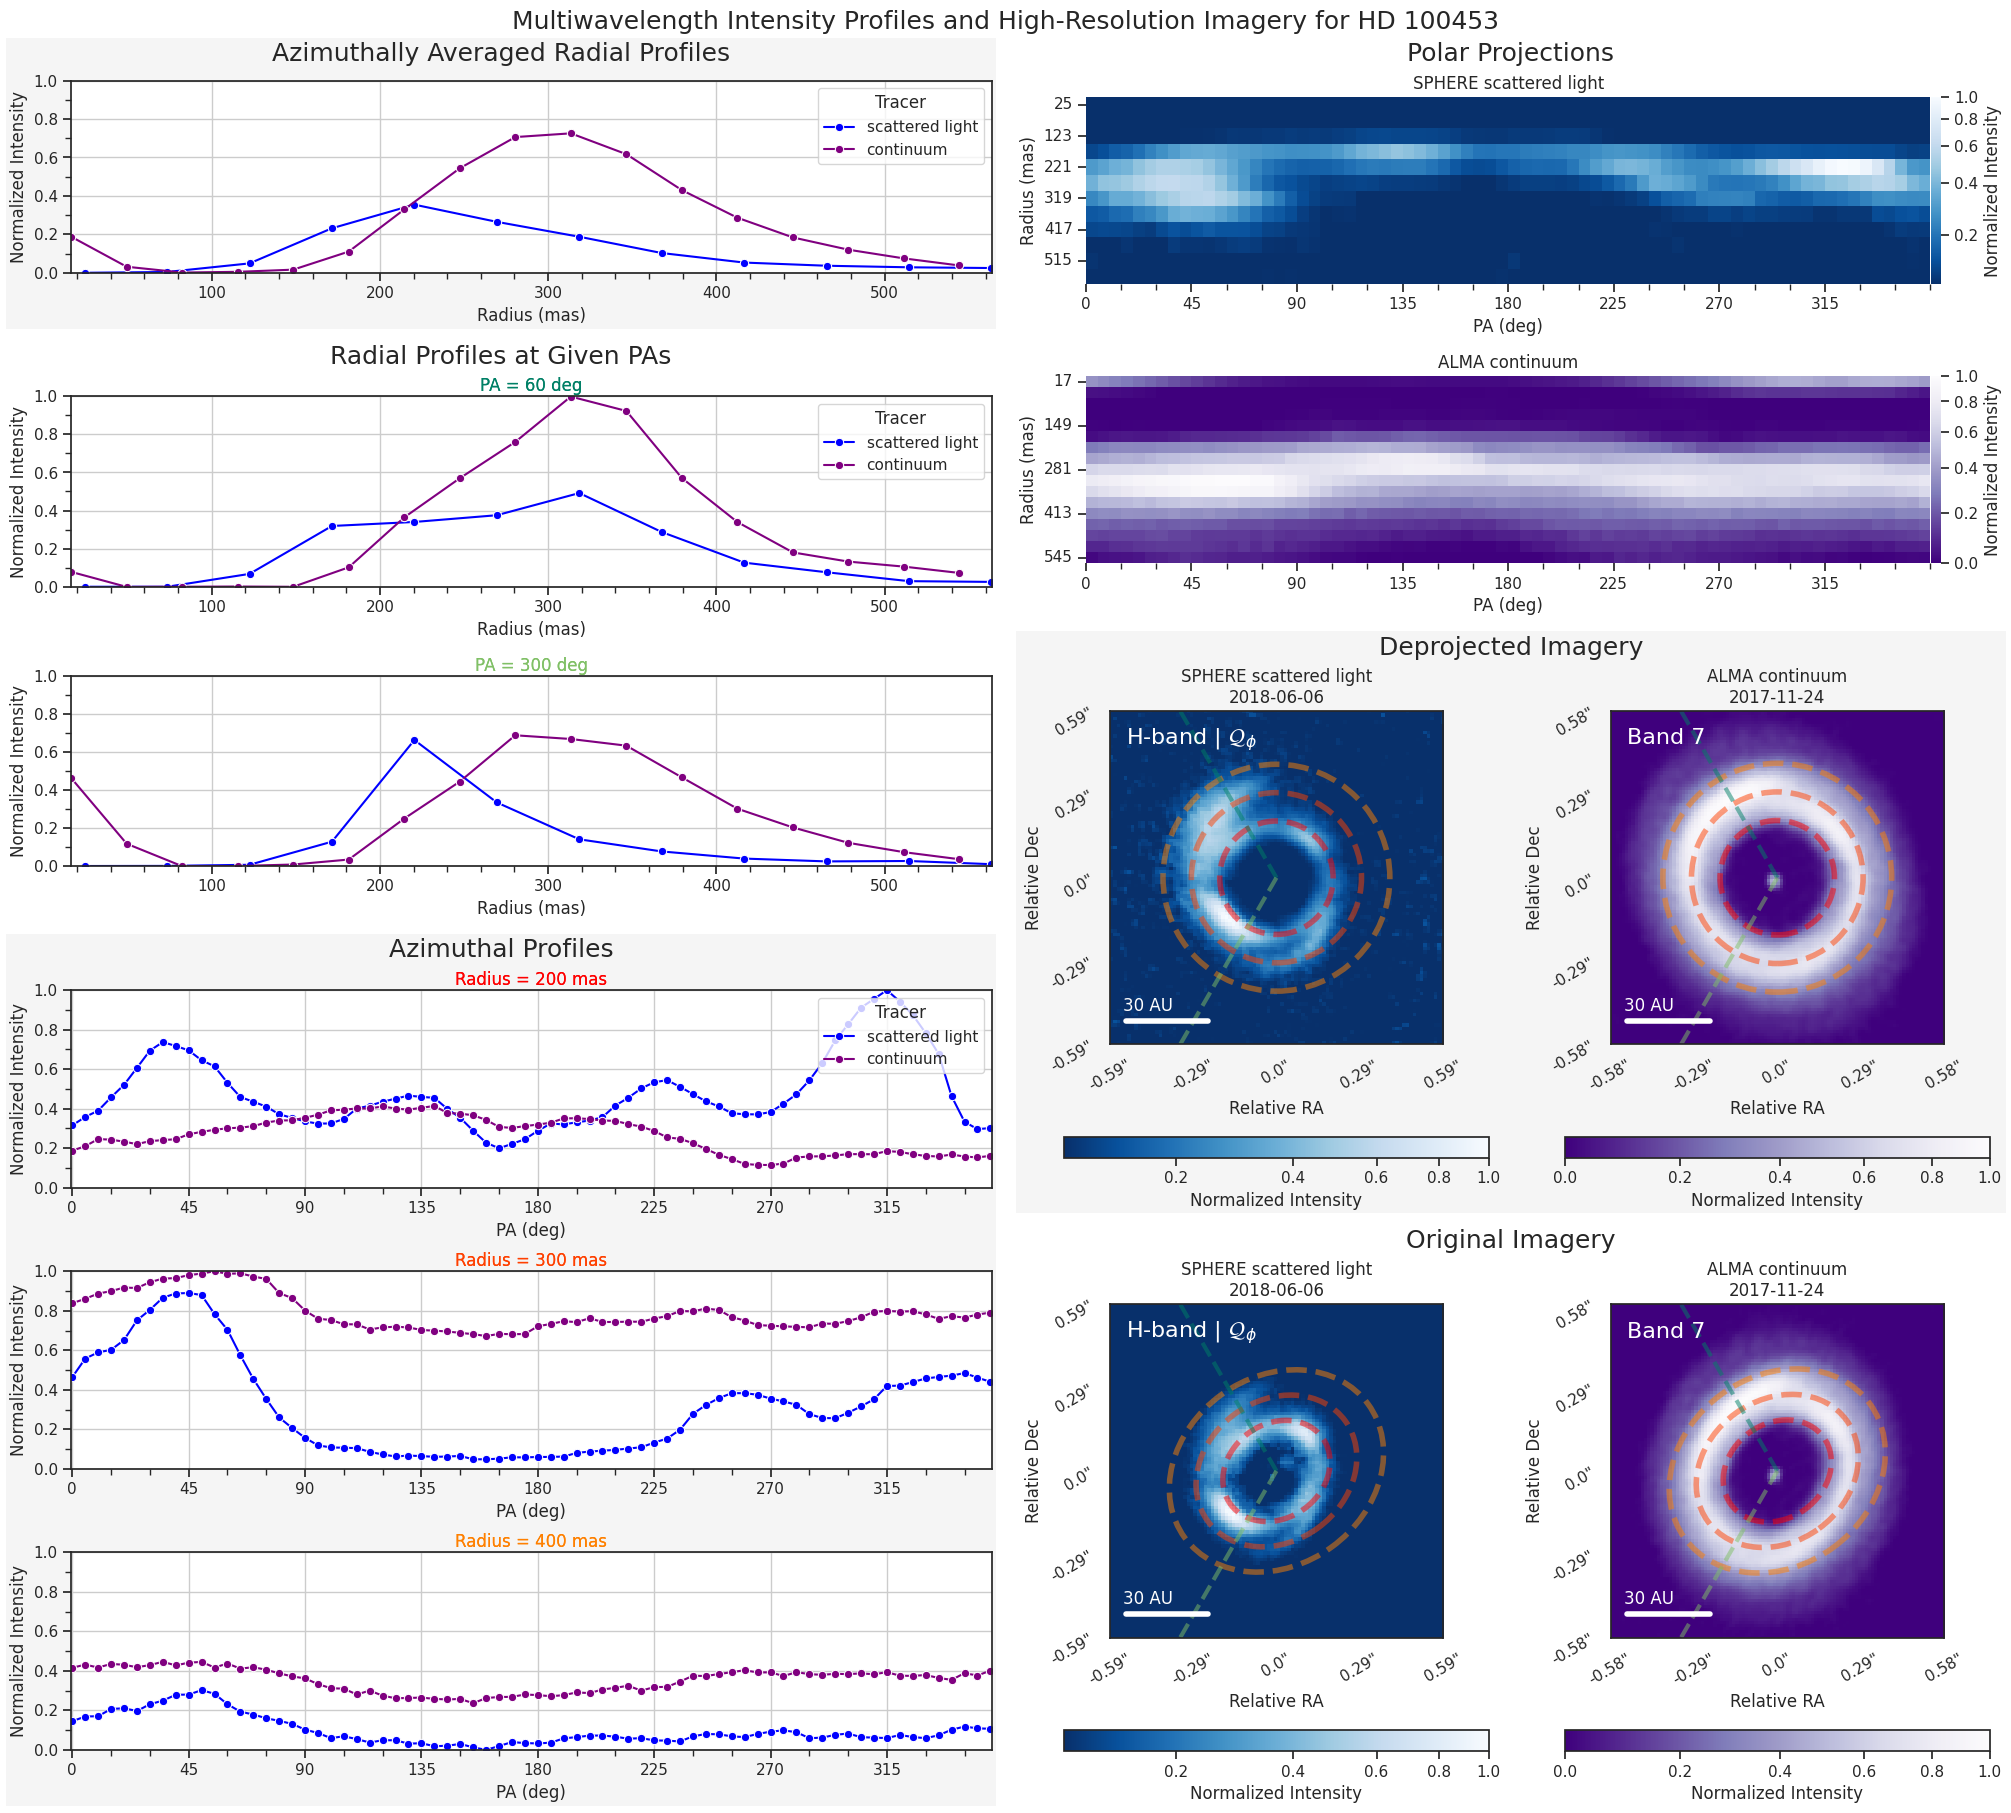

In [12]:
# Plot profiles and images for your desired disks
for disk in disk_lst: astro_objects[disk].make_plot_multiline()